In [139]:
import pandas as pd
import xarray as xr
from glob import glob
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow
# from ../utils.cmod5n import cmod5n_forward, cmod5n_inverse

In [151]:
df1 = pd.read_parquet("../processed_data/wv1_complete.parquet")
df2 = pd.read_parquet("../processed_data/wv2_complete.parquet")

df1r = pd.read_parquet("../results/wv1_results_updated.parquet")
df2r = pd.read_parquet("../results/wv2_results_updated.parquet")

# df1w = pd.read_parquet("../results/wv1_wind_results.parquet")
# df2w = pd.read_parquet("../results/wv2_wind_results.parquet")

df1w = pd.read_parquet("../msc-thesis/results/wv1_wind_results.parquet")
df2w = pd.read_parquet("../msc-thesis/results/wv2_wind_results.parquet")


In [141]:
df1w

,sar_filepath,era5_wspd,era5_wdir,wspd_perturbed,wdir_perturbed,phi_perturbed,phi_nominal,wspd_perturbed_strong,wdir_perturbed_strong,phi_perturbed_strong,...,errors_mix1,errors_mix2,errors_mix3,errors_mix4,errors_no_mix,kw_statistic,kw_p_value,is_scale_dependent,radial_psd,k_values
0,/projects/fluxsar/data/Sentinel1/WV/2021/S1A_W...,17.968573,231.910529,19.229731,230.387449,151.919676,153.442749,20.490888,228.864369,150.396596,...,"{'abs_error': 3.8662606029272455, 'bias': 1.73...","{'abs_error': 1.1777127418529743, 'bias': -0.9...","{'abs_error': 3.8444280095206516, 'bias': 1.73...","{'abs_error': 1.229313416777188, 'bias': -0.96...","{'abs_error': 3.6159229131536565, 'bias': -0.2...",110716.822530,0.0,True,"[290606210.987959, 58219.546785801125, 23337.6...","[0.0, 0.0009615384615384616, 0.001923076923076..."
1,/projects/fluxsar/data/Sentinel1/WV/2021/S1A_W...,16.669525,82.010073,17.704843,80.397187,7.966920,9.579803,18.740161,78.784302,6.354034,...,"{'abs_error': 4.537599618813043, 'bias': 1.912...","{'abs_error': 1.0830349800609897, 'bias': 0.89...","{'abs_error': 4.521665947102979, 'bias': 1.918...","{'abs_error': 1.1904400152474783, 'bias': 0.90...","{'abs_error': 4.528895258620689, 'bias': 1.640...",112207.069602,0.0,True,"[494878416.9883625, 281429.1852758313, 53151.0...","[0.0, 0.0009523809523809524, 0.001904761904761..."
2,/projects/fluxsar/data/Sentinel1/WV/2021/S1A_W...,18.104559,257.966243,19.389358,256.452565,-25.365184,-23.851501,20.674156,254.938886,-26.878863,...,"{'abs_error': 3.981469484569905, 'bias': 1.704...","{'abs_error': 1.6661464279448184, 'bias': 1.59...","{'abs_error': 3.9640510861754037, 'bias': 1.70...","{'abs_error': 1.7317930391160152, 'bias': 1.61...","{'abs_error': 4.2517709488187085, 'bias': 2.24...",109578.101387,0.0,True,"[765619767.4546547, 619649.7372864034, 87178.8...","[0.0, 0.000966183574879227, 0.0019323671497584..."
3,/projects/fluxsar/data/Sentinel1/WV/2021/S1A_W...,18.864727,218.367967,20.281681,216.906840,138.543742,140.004883,21.698635,215.445713,137.082615,...,"{'abs_error': 5.004353354163676, 'bias': 1.335...","{'abs_error': 1.086517212775626, 'bias': 0.600...","{'abs_error': 4.993775613980962, 'bias': 1.350...","{'abs_error': 1.284905654565457, 'bias': 0.630...","{'abs_error': 5.014605309489645, 'bias': 0.975...",109933.132918,0.0,True,"[269566545.91985387, 260159.95583065617, 47984...","[0.0, 0.000966183574879227, 0.0019323671497584..."
4,/projects/fluxsar/data/Sentinel1/WV/2021/S1A_W...,15.404937,64.312639,16.220407,62.612329,-10.106054,-8.405746,17.035876,60.912020,-11.806364,...,"{'abs_error': 3.965219688529205, 'bias': 1.357...","{'abs_error': 1.3610006451325358, 'bias': 1.21...","{'abs_error': 3.945006021182266, 'bias': 1.355...","{'abs_error': 1.4405342605442175, 'bias': 1.22...","{'abs_error': 4.1928806711705375, 'bias': 1.84...",112147.174132,0.0,True,"[450521934.2227616, 494846.73902388243, 143567...","[0.0, 0.0009523809523809524, 0.001904761904761..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,/projects/fluxsar/data/Sentinel1/WV/2020/S1A_W...,17.630833,72.881280,18.833274,71.334851,136.679517,138.225952,20.035716,69.788423,135.133088,...,"{'abs_error': 4.89333095962318, 'bias': 1.4639...","{'abs_error': 1.3515745403077206, 'bias': -0.3...","{'abs_error': 4.876145711995577, 'bias': 1.474...","{'abs_error': 1.4651304389625943, 'bias': -0.3...","{'abs_error': 4.935250567670904, 'bias': 0.337...",114121.611870,0.0,True,"[361395314.16493577, 142090.5181169983, 42568....","[0.0, 0.000925925925925926, 0.0018518518518518..."
36917,/projects/fluxsar/data/Sentinel1/WV/2020/S1A_W...,16.605844,122.927327,17.630091,121.310039,-167.748891,-166.131592,18.654338,119.692751,-169.366179,...,"{'abs_error': 3.5895622982105553, 'bias': 2.17...","{'abs_error': 1.1217694759969121, 'bias': -0.9...","{'abs_error': 3.561433434258334, 'bias': 2.160...","{'abs_error': 1.1607400140339728, 'bias': -0.9...","{'abs_error': 3.053529338745572, 'bias

In [137]:
len(df1r), len(df2r), len(df1), len(df2)

(36921, 36995, 36921, 36996)

In [106]:
def pad_arrays_to_max_length(df, column_name, size=None):
    # Find the maximum length in the column
    max_length = df[column_name].apply(lambda x: len(x)).max()
    
    # Define a padding function
    def pad_array(arr, size=size):
        # Calculate how many zeros to add
        if not size:
            padding_size = max_length - len(arr)
        else:
            padding_size = size - len(arr)
        # Return padded array if needed, otherwise return the original
        if padding_size > 0:
            return np.pad(arr, (0, padding_size), 'constant', constant_values=0)
        else:
            return arr
    
    # Apply the padding function to each array in the column
    df[column_name + '_padded'] = df[column_name].apply(pad_array)
    
    return df

In [107]:
df1r = pad_arrays_to_max_length(df1r, 'radial_psd')
df2r = pad_arrays_to_max_length(df2r, 'radial_psd', 150)

In [108]:
k_values_idx = df1r['k_values'].apply(lambda x: len(x)).argmax()
k_values = df1r['k_values'].iloc[k_values_idx]

In [109]:
def create_phi_bins_columns(df):
    df['phi_bins'] = pd.cut(
    df['phi_nominal_median'], 
    bins=np.arange(-180, 181, 1),
    right=False,  # Makes intervals like [0,1), [1,2), etc.
    include_lowest=True
    )

    df["phi_bins"] = df["phi_bins"].astype(str)

    return df
    
    


In [110]:
df1 = create_phi_bins_columns(df1)
df2 = create_phi_bins_columns(df2)

In [111]:
df1r["renamed_filename"] = df1r.sar_filepath.apply(lambda x: x.split("/")[-1])
df2r["renamed_filename"] = df2r.sar_filepath.apply(lambda x: x.split("/")[-1])

In [119]:
df1_0_1 = df1[df1.phi_bins == '[0, 1)']
df2_0_1 = df2[df2.phi_bins == '[0, 1)']

df1r_01 = df1r[df1r['renamed_filename'].isin(df1_0_1['renamed_filename'])]
df2r_01 = df2r[df2r['renamed_filename'].isin(df2_0_1['renamed_filename'])]

In [120]:
df1_az = df1[df1.phi_bins == '[-90, -89)']
df2_az = df2[df2.phi_bins == '[-90, -89)']

df1r_az = df1r[df1r['renamed_filename'].isin(df1_az['renamed_filename'])]
df2r_az = df2r[df2r['renamed_filename'].isin(df2_az['renamed_filename'])]


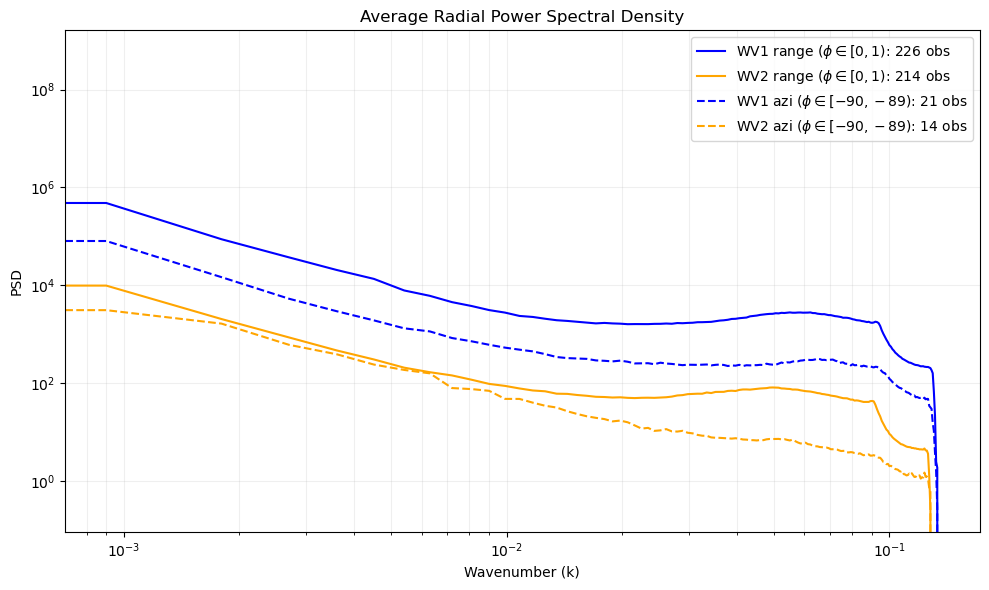

In [132]:
mean_radial_psd_wv1_01 = df1r_01.radial_psd_padded.mean()
mean_radial_psd_wv2_01 = df2r_01.radial_psd_padded.mean()

mean_radial_psd_wv1_az = df1r_az.radial_psd_padded.mean()
mean_radial_psd_wv2_az = df2r_az.radial_psd_padded.mean()

total_range_wv1_observations = df1r_01['renamed_filename'].nunique()
total_range_wv2_observations = df2r_01['renamed_filename'].nunique()

total_azi_wv1_observations = df1r_az['renamed_filename'].nunique()
total_azi_wv2_observations = df2r_az['renamed_filename'].nunique()

plt.figure(figsize=(10, 6))
plt.loglog(k_values, mean_radial_psd_wv1_01, label=f'WV1 range $(\phi \in [0, 1)$: {total_range_wv1_observations} obs', color='blue')
plt.loglog(k_values, mean_radial_psd_wv2_01, label=f'WV2 range $(\phi \in [0, 1)$: {total_range_wv2_observations} obs', color='orange')
plt.loglog(k_values, mean_radial_psd_wv1_az, label=f'WV1 azi $(\phi \in [-90, -89)$: {total_azi_wv1_observations} obs', color='blue', linestyle='--')
plt.loglog(k_values, mean_radial_psd_wv2_az, label=f'WV2 azi $(\phi \in [-90, -89)$: {total_azi_wv2_observations} obs', color='orange', linestyle='--')
plt.xlabel('Wavenumber (k)')
plt.ylabel('PSD')
plt.title('Average Radial Power Spectral Density')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.legend()
plt.show()